# <div style="text-align:center;">**Capuchin Bird Signal Processing**</div>

# 1. Load Dependencies

Since I am using a venv, I am installing the required packages using pip. For some reason tf.audio.decode_wav does not work with tensorflow 2.14.0. I couldn't install tensorflow 2.8.0 from python 3.11 so I am using python 3.8.6 to install the following dependencies.

In [4]:
%pip install matplotlib
%pip install tensorflow==2.8.0
%pip install tensorflow_io==0.24.0

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/159.4 kB ? eta -:--:--
     -------------------------------------- 159.4/159.4 kB 9.3 MB/s eta 0:00:00
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.5 MB 15.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.2/7.5 MB 19.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.5 MB 20.4 MB/s eta 0:00:01
   ------------------------- -------------- 4.7/7.5 MB 21.7 MB/s eta 0:00:01
   -------------------------------- ------- 6.1/7.5 MB 23.0 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 21.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/477.9 kB ? eta -:--:--
   -----------------------------------

Furthermore, to be able to import tensorflow 2.8.0, the photobuf plugin needs to be downgraded to a version < 3.20. 

In [6]:
%pip install protobuf==3.20

     ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
     ---------------------------------- -- 849.9/904.4 kB 27.1 MB/s eta 0:00:01
     ------------------------------------- 904.4/904.4 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.1
    Uninstalling protobuf-4.25.1:
      Successfully uninstalled protobuf-4.25.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import sys

In [2]:
print('tensorflow version:', tf.__version__)
print('tensorflow_io version:', tfio.__version__)
print(sys.version)

tensorflow version: 2.8.0
tensorflow_io version: 0.24.0
3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]


Lets export the dependencies used in a txt file.

In [7]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# 2. Data Collection

In [3]:
def load_data(file):
    # read the .wav file
    wav, sample_rate = tf.audio.decode_wav(tf.io.read_file(file), desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

## 3. EDA

Lets use random library to sample some files from each of the folders and see what their respecitve waveforms look like.

A wavegform is essentially a time series plot with the signal amplitude at each instance.

In [69]:
from IPython import display
import random
import collections
random.seed(42) # pass a seed for reproducibility

In [51]:
# sample from the capuchin files
capu_folder_path = 'data/Parsed_Capuchinbird_Clips'
capu_files = os.listdir(capu_folder_path)
capu_sampled = random.sample(capu_files, 4)

display.display(display.Audio(load_data(os.path.join('data', 'Parsed_Capuchinbird_Clips', capu_sampled[0])), rate=16000))

In [52]:
# sample from the non-capuchin files
non_capu_folder_path = 'data/Parsed_Not_Capuchinbird_Clips'
non_capu_files = os.listdir(non_capu_folder_path)
non_capu_sampled = random.sample(non_capu_files, 4)

display.display(display.Audio(load_data(os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', non_capu_sampled[0])), rate=16000))

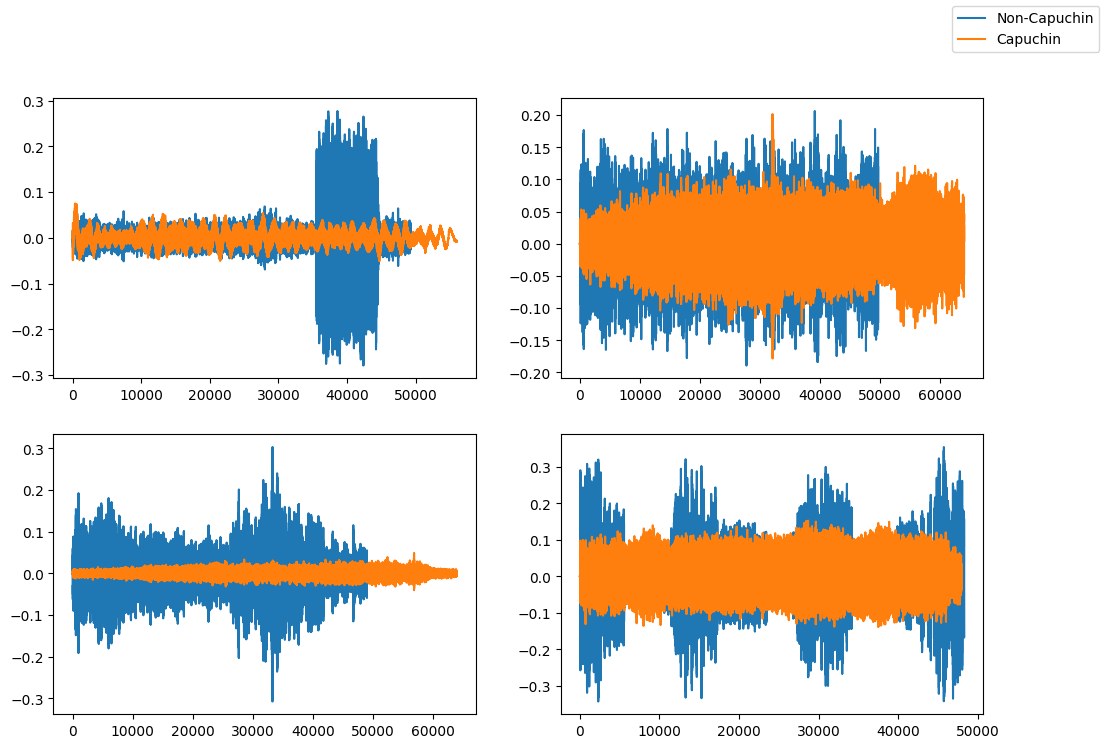

In [54]:
# plot the waveforms
fig, ax = plt.subplots(2,2, figsize=(12,8))
for i in range(4):
    ax[i//2, i%2].plot(load_data(os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', non_capu_sampled[i])))
    ax[i//2, i%2].plot(load_data(os.path.join('data', 'Parsed_Capuchinbird_Clips', capu_sampled[i])))
fig.legend(['Non-Capuchin', 'Capuchin'], loc='upper right')

## Average waveform length

In [92]:
capu_length = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    capu_length.append(len(load_data(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))))

print(collections.Counter(capu_length))
print(tf.math.reduce_sum(list(collections.Counter(capu_length).values())))

Counter({56000: 85, 48000: 58, 64000: 43, 40000: 17, 72000: 5, 32000: 4, 55999: 3, 39999: 1, 80000: 1})
tf.Tensor(217, shape=(), dtype=int32)


Counter({48160: 55, 48304: 49, 48640: 39, 48031: 38, 48559: 28, 49295: 19, 48175: 19, 48560: 19, 48928: 16, 48768: 16, 48703: 14, 48783: 14, 49311: 13, 48655: 13, 49072: 12, 48320: 11, 49056: 11, 48032: 10, 48912: 9, 50111: 9, 50880: 9, 49696: 9, 49055: 8, 50431: 8, 50127: 7, 49071: 7, 48191: 7, 48911: 6, 52079: 5, 50895: 5, 49712: 5, 49695: 5, 51503: 5, 48927: 4, 52080: 4, 53360: 4, 48576: 4, 48767: 4, 48144: 3, 50112: 3, 49711: 3, 49312: 3, 53823: 3, 48176: 3, 50128: 2, 51279: 2, 55472: 2, 54591: 2, 48687: 2, 53359: 2, 51567: 2, 51551: 2, 50432: 2, 58080: 2, 48192: 2, 48575: 2, 56207: 2, 51488: 2, 51295: 1, 51296: 1, 55471: 1, 55456: 1, 54607: 1, 52064: 1, 52063: 1, 53807: 1, 53808: 1, 54047: 1, 54048: 1, 54032: 1, 60735: 1, 60720: 1, 60719: 1, 53375: 1, 51568: 1, 56192: 1, 56191: 1, 61423: 1, 63087: 1, 51487: 1, 52863: 1, 52847: 1, 47229: 1, 49040: 1, 49039: 1})
tf.Tensor(29233161, shape=(), dtype=int32)


Text(0.5, 0, 'waveform length*16k')

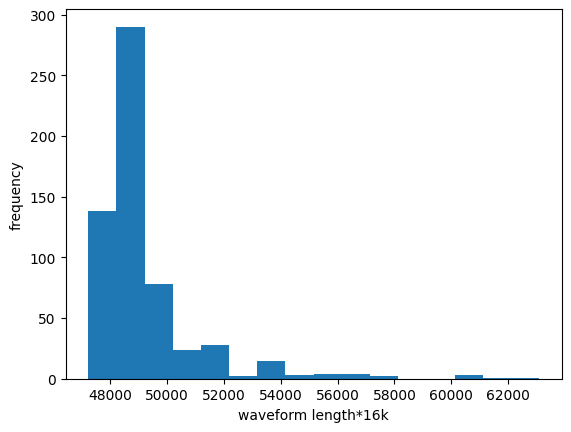

In [82]:
non_capu_length = []
for file in os.listdir(os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')):
    non_capu_length.append(len(load_data(os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', file))))

print(collections.Counter(non_capu_length))
print(tf.math.reduce_sum(non_capu_length))
plt.hist(non_capu_length, bins=16)
plt.ylabel('frequency')
plt.xlabel('waveform length*16k')

## Observations

### 1. There is a class imbalance with capu:non_capu = 1:3. 
Solution: We can fix this issue by using synthetic sampling techniques like SMOTE. 
### 2. The lengths of the recordings vary significantly
Solution: Most of the waveform lengths at least 3 seconds (48000 data points after sampling at 16000Hz). We can therefore cut all wavelengths to this length and use zero padding for the ones that are shorter than that

# 4. Preprocessing and Labelling